# 2023 인공지능연구회 강습회 실습
# (강사: 숙명여자대학교 심주용 - 2023.08.16)
# Lab1: ANN


## 1. Gradient Tape
The **Gradient Tape** is a core feature in TensorFlow used for automatic differentiation, allowing us to compute gradients with respect to some given inputs. This is extremely useful in training machine learning models via gradient-based optimization techniques. Here's a tutorial to help you understand how to work with Gradient Tape in TensorFlow:

$x = x^2$

Gradient Tape Reference: https://www.tensorflow.org/api_docs/python/tf/GradientTape/

 ![GT](https://raw.githubusercontent.com/jooyongsim/AI_tutorials_2023/main/photos/gradient_tape.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 6]


In [3]:
x = tf.Variable([[5]], dtype = tf.float32)
with tf.GradientTape() as tape:
  y = x * x
dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor([[10.]], shape=(1, 1), dtype=float32)


## 2. Machine Learning with TensorFlow


### 2.1. Linear Regression

Given  $x$ and  $y$, we want to estimate $w$ and $b$

**$\hat{y}=wx+b$**

### **Given Variables**

- $ x $ and $ y $: These are variables representing input and output in a dataset. Typically, $ x $ is an independent variable (e.g., a feature of the data), and $ y $ is a dependent variable (e.g., a label or target to be predicted).




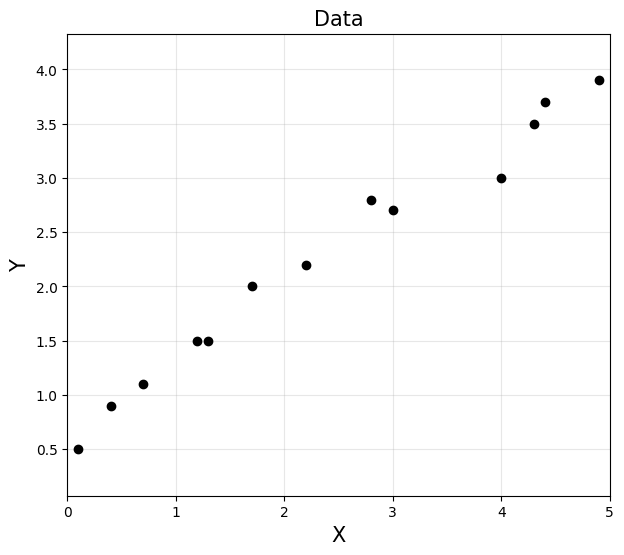

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Creating data points as column vectors
# train_x and train_y represent the input and output of the training data
train_x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
train_y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

# Storing the number of training examples
m = train_x.shape[0]

plt.figure()
plt.plot(train_x, train_y, 'ko')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

### Optimzation

### **Objective**

- **Estimating $ w $ and $ b $**: The goal of linear regression is to find the values of the weight $ w $ and bias $ b $ that best describe the relationship between $ x $ and $ y $. These values define a linear function that models the data.

### **Data Points**

- **Given $ (x_i, y_i) $ for $ i = 1, \ldots, m $**: This means that there are $ m $ pairs of corresponding input and output data points, with $ x_i $ representing the $ i $-th input and $ y_i $ representing the $ i $-th output.

###**Linear Relationship**

- **$ y_i = wx_i + b $**: This equation defines a linear relationship between the input $ x_i $ and the output $ y_i $, where $ w $ is the slope or weight, and $ b $ is the y-intercept or bias. This is the equation of a straight line, and the goal is to find the values of $ w $ and $ b $ that best fit the given data.

### **Objective Function**

- **$ \displaystyle \min_{w,b}{\sum_{i=1}^{n}{(\hat{y_i}−y_i)^2}} $**: This is the objective function for linear regression, also known as the loss function. It represents the sum of the squared differences between the predicted values $\hat{y_i}$ (calculated as $ wx_i + b $) and the actual values $ y_i $. The goal is to find the values of $ w $ and $ b $ that minimize this sum, hence the use of the $\min$ symbol.



 optimal w = [[0.74257565]]

 optimal b = [[0.41717836]]


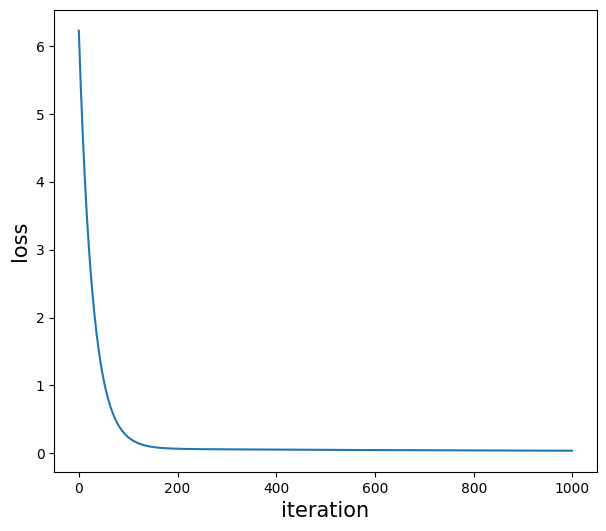

In [5]:
LR = 0.001
n_iter = 10000

w = tf.Variable([[0]], dtype = tf.float32)
b = tf.Variable([[0]], dtype = tf.float32)

loss_record = []
for i in range(1000):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean(tf.square(w*train_x + b - train_y))
        w_grad, b_grad = tape.gradient(cost, [w,b])

    loss_record.append(cost)
    w.assign_sub(LR * w_grad) # w = w - LR*w_grad
    b.assign_sub(LR * b_grad) # b = b - LR*b_grad
print("\n optimal w =", w.numpy())
print("\n optimal b =", b.numpy())
w_val = w.numpy()
b_val = b.numpy()

plt.figure()
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

### Prediction
We will outline a simple linear regression problem. Given a set of data points $ (x_i, y_i) $, the task is to find the best-fitting straight line described by the equation $ y_i = wx_i + b $. The "best" line is determined by minimizing the sum of the squared differences between the predicted values and the actual values, as expressed in the given objective function.

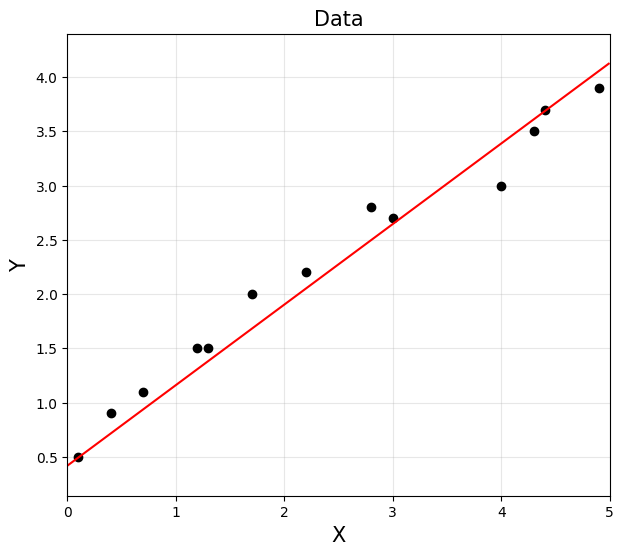

In [6]:
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = w_val*xp + b_val

plt.figure()
plt.plot(train_x, train_y, 'ko')
plt.plot(xp, yp, 'r')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

### 2.2. Logistic Regression

Train a logistic regression model to classify the generated data points. This involves defining the logistic loss function and utilizing gradient descent to minimize this loss:

$ \displaystyle \ell{(w)} = \log{L(w)} =  \frac{1}{m} \sum_{i=1}^m y_i \log{(h_w(x_i))} + (1 - y_i) \log(1 - h_w(x_i)) $

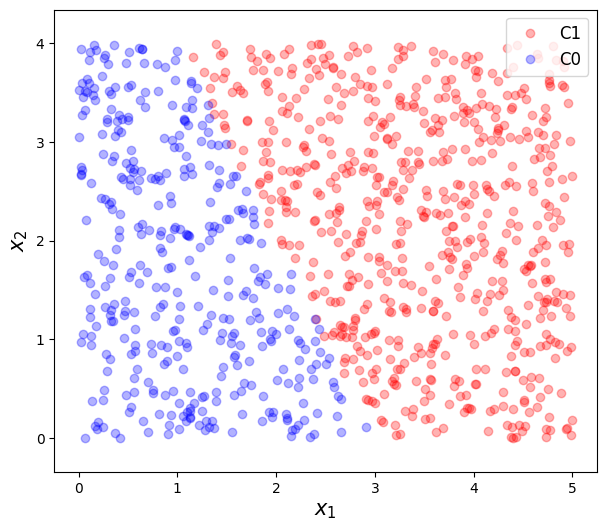

In [7]:
# datat generation

m = 1000
true_w = np.array([[-6], [2], [1]])
train_X = np.hstack([np.ones([m,1]), 5*np.random.rand(m,1), 4*np.random.rand(m,1)])

true_w = np.asmatrix(true_w)
train_X = np.asmatrix(train_X)

train_y = 1/(1 + np.exp(-train_X*true_w)) > 0.5

C1 = np.where(train_y == True)[0]
C0 = np.where(train_y == False)[0]

train_y = np.empty([m,1])
train_y[C1] = 1
train_y[C0] = 0

plt.figure()
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label='C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label='C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

train_x: (1000, 3), w: (3, 1)
w_hat:  [-3.873554    1.7876178   0.35828814] (3,)


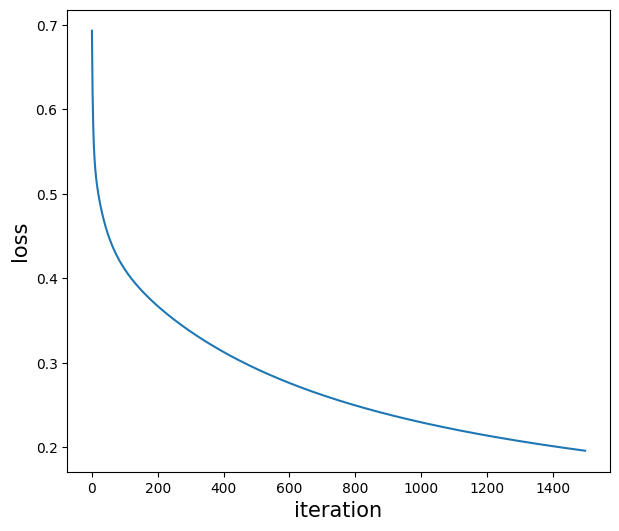

In [20]:
LR = 0.05
n_iter = 1500

w = tf.Variable([[0],[0],[0]], dtype = tf.float32)
train_x = tf.constant(train_X, dtype= tf.float32)
train_y = tf.constant(train_y, dtype= tf.float32)

print(f'train_x: {train_x.shape}, w: {w.shape}')

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        y_pred = tf.sigmoid(tf.matmul(train_x, w))
        loss = - train_y*tf.math.log(y_pred) - (1-train_y)*tf.math.log(1-y_pred)
        loss = tf.reduce_mean(loss)
        w_grad = tape.gradient(loss, w)

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)

w_hat = w.numpy().squeeze(1)
print('w_hat: ', w_hat)

plt.figure()
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

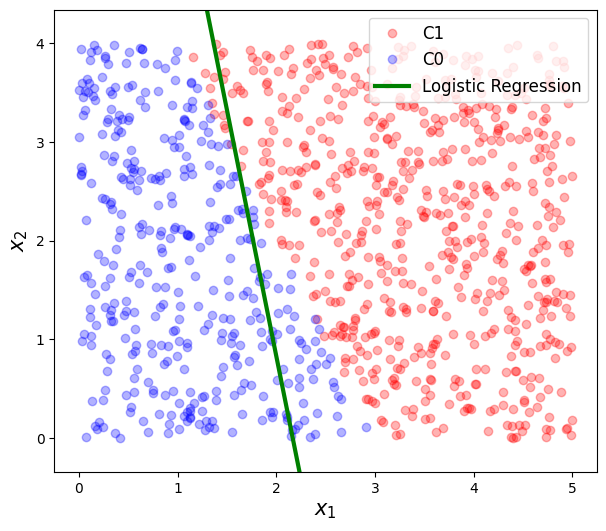

In [9]:
xp = np.arange(0, 4, 0.01).reshape(-1, 1)
yp = - w_hat[1]*xp/w_hat[2] - w_hat[0]/w_hat[2]

plt.figure()
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

### Keras: tf.keras.models
Build a model using Keras

- Regular densely-connected NN layer.
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

- Get Weights
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#get_weights

Dense implements the operation: **output = activation(dot(input, kernel) + bias)** where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.

Note: If the input to the layer has a rank greater than 2, then **Dense computes** the dot product between the inputs and the kernel along the last axis of the inputs and axis 0 of the kernel (using tf.tensordot). For example, if input has dimensions **(batch_size, d0, d1)**, then we create a kernel with shape **(d1, units)**, and the kernel operates along axis 2 of the input, on every sub-tensor of shape (1, 1, d1) (there are batch_size * d0 such sub-tensors). The output in this case will have shape *(batch_size, d0, units)**.

Epoch 1/10
32/32 [==============================] - 1s 4ms/step - loss: 0.4140
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.2624
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.2024
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1732
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1531
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1387
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1256
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1183
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1093
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1101
w: [[3.2501183]
 [1.2554471]], b: [-8.896646]


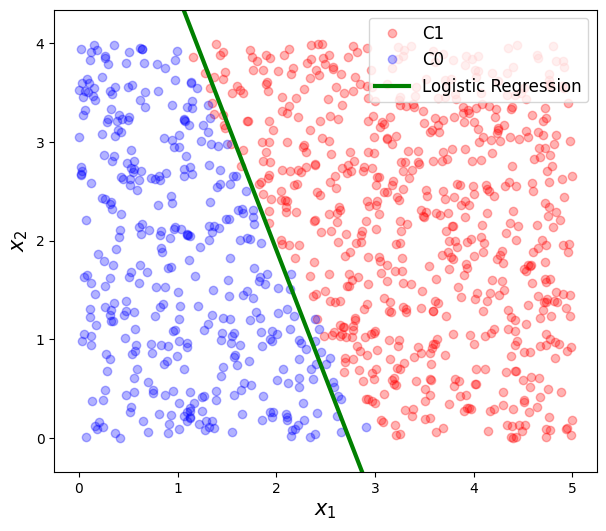

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_dim = 2,
                          units = 1,
                          activation = 'sigmoid')
])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                           loss = 'binary_crossentropy')

train_x = tf.constant(train_X[:,1:], dtype= tf.float32)
train_y = tf.constant(train_y, dtype= tf.float32)

loss = model.fit(train_x, train_y, epochs = 10)

w, b = model.layers[0].get_weights()
print(f'w: {w}, b: {b}')

x1p = np.arange(0, 4, 0.01).reshape(-1, 1)
x2p = - w[0,0]/w[1,0]*x1p - b[0]/w[1,0]

plt.figure()
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(x1p, x2p, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

### 2.3 Nonlinear Transformation

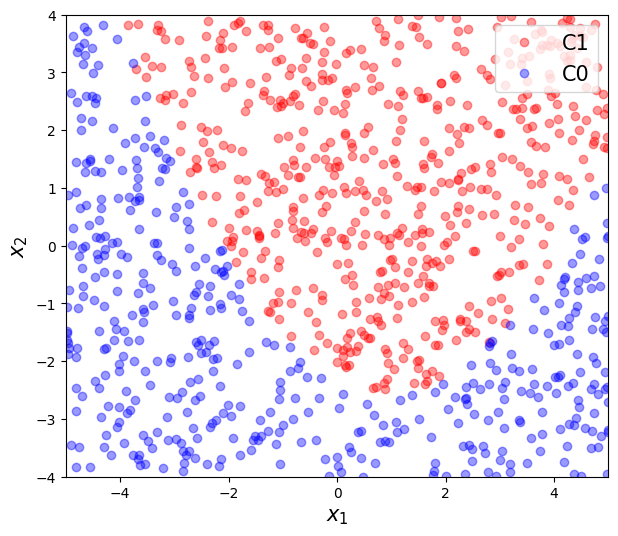

In [22]:
# training data gerneration

m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.asmatrix(train_X)

train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

plt.figure()
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

### Build ANN Model

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_dim = 2, units = 2, activation = 'sigmoid'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                           loss = 'binary_crossentropy')
loss = model.fit(train_X, train_y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 0.5615
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3792
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3047
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2371
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1755
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1492
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1317
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 0.1182
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1020
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0908


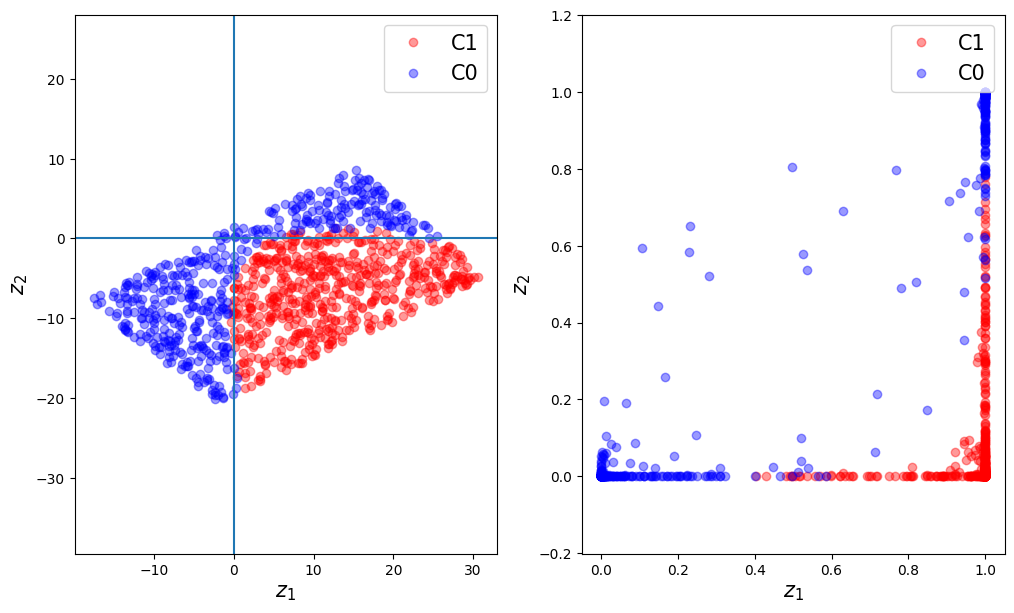

In [35]:
w1, b1 = model.layers[0].get_weights()
w2, b2 = model.layers[1].get_weights()

X = train_X
logits = train_X*w1 + b1
H = 1/(1 + np.exp(-logits))

plt.figure(figsize=(12,7))
plt.subplot(121)
plt.plot(logits[0:N,0], logits[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(logits[N:m,0], logits[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.axhline(0)
plt.axvline(0)

plt.subplot(122)
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')

plt.show()

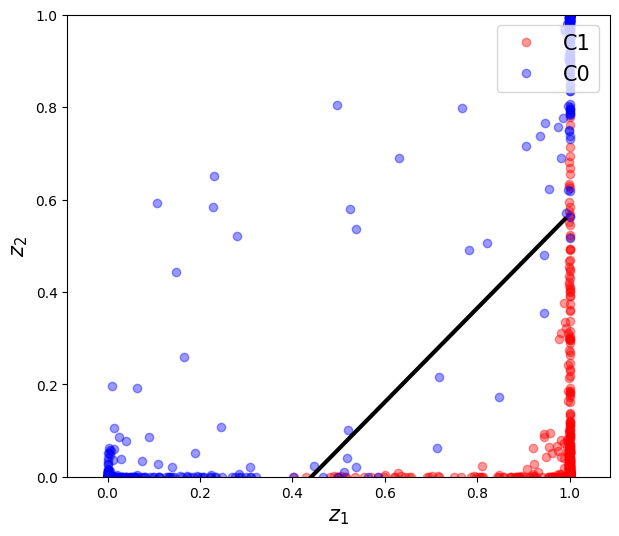

In [37]:
x1p = np.arange(0, 1, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[1,0]*x1p - b2[0]/w2[1,0]

plt.figure()
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

## MNIST


The training data set is:

(60000, 28, 28)
(60000,)
The test data set is:
(10000, 28, 28)
(10000,)


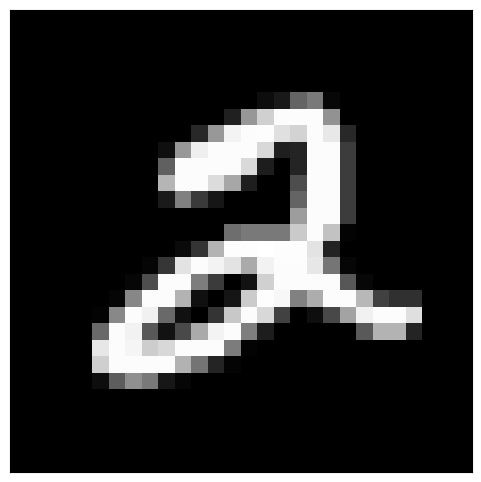

2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0
print ("The training data set is:\n")
print (train_x.shape)
print (train_y.shape)

print ("The test data set is:")
print (test_x.shape)
print (test_y.shape)

img = np.reshape(train_x[5], (28,28))
img = train_x[5].reshape(28,28)
# So now we have a 28x28 matrix, where each element is an intensity level from 0 to 1.

plt.figure(figsize = (6,6))
plt.imshow(img, 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('label for the image:', train_y[5])


### 3.1. Define an ANN Structure
- Input size
- Hidden layer size
- The number of classes

 Define Weights, Biases, and Placeholder
Define parameters based on predefined layer size
Initialize with normal distribution with $\mu=0$
  and $\sigma=0.1$

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(units = 100, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

### 3.2. Define Loss and Optimizer
Loss

This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.

- Classification: Cross entropy

Equivalent to apply logistic regression

$ \displaystyle \ell{(w)}  =  \frac{1}{m} \sum_{i=1}^m y_i \log{(h_w(x_i))} + (1 - y_i) \log(1 - h_w(x_i)) $

**Optimizer**

This defines how the model is updated based on the data it sees and its loss function.
AdamOptimizer: the most popular optimizer

In [6]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# Train Model
loss = model.fit(train_x, train_y, epochs = 5)
test_loss, test_acc = model.evaluate(test_x, test_y)


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2717 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1204 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0850 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0644 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0514 - accuracy: 0.9844


### 3.3. Test or Evaluate


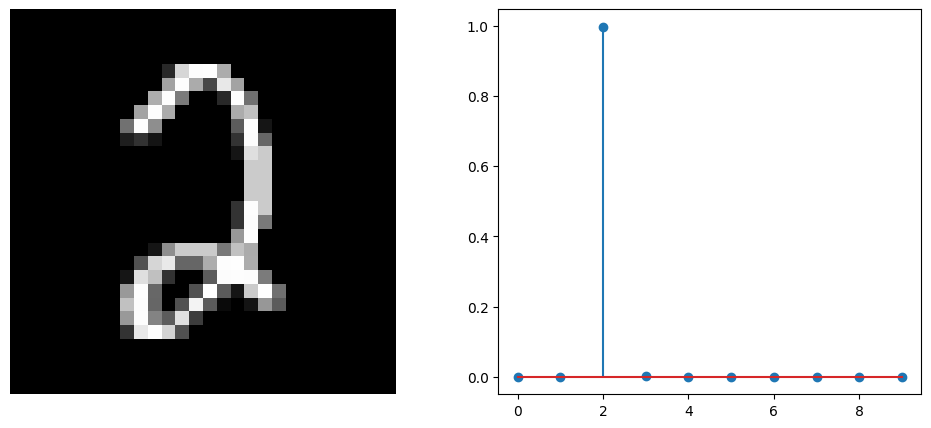

Prediction : 2


In [9]:
test_img = test_x[np.random.choice(test_x.shape[0], 1)]

predict = model.predict_on_batch(test_img)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

## Autoencoder

### 4.1. Define a Structure of an Autoencoder
Input shape and latent variable shape
- Encoder shape
- Decoder shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
# Load Data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0],28*28)) / 255
x_test = x_test.reshape((x_test.shape[0],28*28)) / 255
# Use Only 1,5,6 Digits to Visualize

train_idx1 = np.array(np.where(y_train == 1))
train_idx5 = np.array(np.where(y_train == 5))
train_idx6 = np.array(np.where(y_train == 6))
train_idx = np.sort(np.concatenate((train_idx1, train_idx5, train_idx6), axis= None))

test_idx1 = np.array(np.where(y_test == 1))
test_idx5 = np.array(np.where(y_test == 5))
test_idx6 = np.array(np.where(y_test == 6))
test_idx = np.sort(np.concatenate((test_idx1, test_idx5, test_idx6), axis= None))

train_imgs = x_train[train_idx]
train_labels = y_train[train_idx]
test_imgs = x_test[test_idx]
test_labels = y_test[test_idx]
n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_imgs.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_imgs.shape))

# Define Structure

# Encoder Structure
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, activation = 'relu', input_shape = (28*28,)),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = None)
    ])

# Decoder Structure
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300, activation = 'relu', input_shape = (2,)),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(28*28, activation = None)
    ])

### 4.2. Define Loss and Optimizer
- Loss: Squared loss
$ \displaystyle \frac{1}{m} \sum_{i=1}^m(t_i-y_i)^2$

**Optimizer**

AdamOptimizer: the most popular optimizer

In [12]:
# Autoencoder = Encoder + Decoder
autoencoder = tf.keras.models.Sequential([encoder, decoder])

autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = 'mean_squared_error',
                    metrics = ['mse'])
# Train Model & Evaluate Test Data

training = autoencoder.fit(train_imgs, train_imgs, batch_size = 50, epochs = 10)


The number of training images : 18081, shape : (18081, 784)
The number of testing images : 2985, shape : (2985, 784)
Epoch 1/10
362/362 [==============================] - 12s 24ms/step - loss: 0.0383 - mse: 0.0383
Epoch 2/10
362/362 [==============================] - 9s 25ms/step - loss: 0.0301 - mse: 0.0301
Epoch 3/10
362/362 [==============================] - 12s 34ms/step - loss: 0.0287 - mse: 0.0287
Epoch 4/10
362/362 [==============================] - 12s 32ms/step - loss: 0.0279 - mse: 0.0279
Epoch 5/10
362/362 [==============================] - 9s 26ms/step - loss: 0.0274 - mse: 0.0274
Epoch 6/10
362/362 [==============================] - 8s 22ms/step - loss: 0.0268 - mse: 0.0268
Epoch 7/10
362/362 [==============================] - 11s 30ms/step - loss: 0.0265 - mse: 0.0265
Epoch 8/10
362/362 [==============================] - 11s 29ms/step - loss: 0.0261 - mse: 0.0261
Epoch 9/10
362/362 [==============================] - 7s 19ms/step - loss: 0.0259 - mse: 0.0259
Epoch 10/10
36

### 4.3. Test or Evaluate###


94/94 - 1s - loss: 0.0261 - mse: 0.0261 - 1s/epoch - 11ms/step
Test loss: 0.02613963931798935
Mean Squared Error: 2.613963931798935 %
1/1 [==============================] - 0s 80ms/step


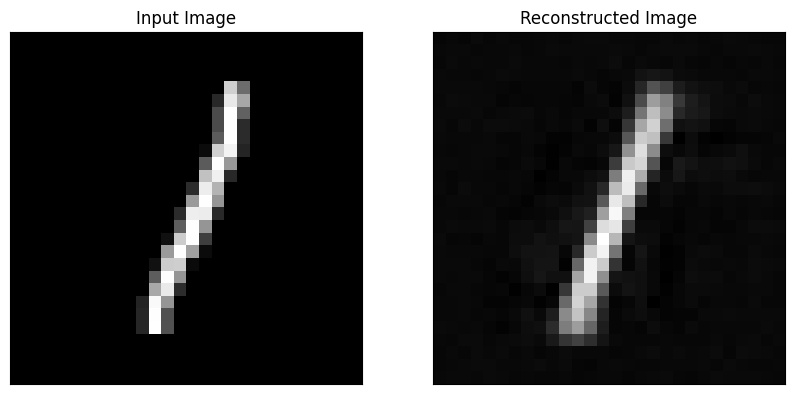

In [14]:
test_scores = autoencoder.evaluate(test_imgs, test_imgs, verbose = 2)
print('Test loss: {}'.format(test_scores[0]))
print('Mean Squared Error: {} %'.format(test_scores[1]*100))

# Visualize Evaluation on Test Data

rand_idx = np.random.randint(1, test_imgs.shape[0])
# rand_idx = 6

test_img = test_imgs[rand_idx]
reconst_img = autoencoder.predict(test_img.reshape(1,28*28))

plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28,28), 'gray')
plt.title('Input Image', fontsize = 12)

plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(reconst_img.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 12)
plt.xticks([])
plt.yticks([])

plt.show()

### 4.2. Latent Space and Generation

16/16 [==============================] - 0s 8ms/step


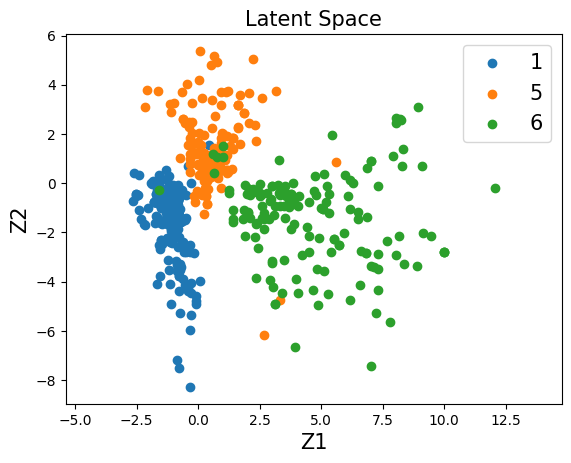

In [16]:
idx = np.random.randint(0, len(test_labels), 500)
test_x, test_y = test_imgs[idx], test_labels[idx]
test_latent = encoder.predict(test_x)

plt.figure()
plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()

### 4.4 Data Generation

It generates something that makes sense.

These results are unsatisfying, because the density model used on the latent space ℱ is too simple and inadequate.

Building a “good” model amounts to our original problem of modeling an empirical distribution, although it may now be in a lower dimension space.

This is a motivation to VAE or GAN.

1/1 [==============================] - 0s 129ms/step


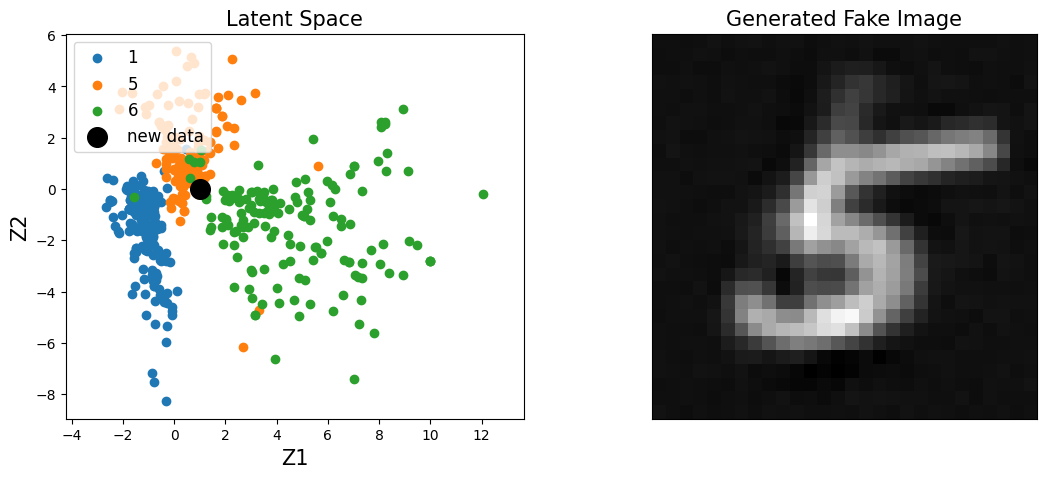

In [18]:
new_data = np.array([[1, 0]])

fake_image = decoder.predict(new_data)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')
plt.scatter(new_data[:,0], new_data[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(fake_image.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()